# Deep Learning Parctical Labs n°1: Perceptron



# Part1: Theorical Questions
In this section, we will evaluate the complexity


1.   Space Complexity: o(d) the most variable that take place in memory is the weight w so we will have an o(d) as complexity
2.   Time Complexity: o(n * m * d) where n is the maximum number of iterations and m is the number of instances in the training set and d the length of our feature x



# Part2: Installation Part

In [1]:
!pip install numpy==1.16.5
!pip install pandas==0.25.1
!pip install sklearn
!pip install matplotlib==3.1.1

     |████████████████████████████████| 17.3 MB 49 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.16.5 which is incompatible.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.16.5 which is incompatible.
pyerfa 2.0.0 requires numpy>=1.17, but you have numpy 1.16.5 which is incompatible.
pyarrow 3.0.0 requires numpy>=1.16.6, but you have numpy 1.16.5 which is incompatible.
kapre 0.3.5 requires numpy>=1.18.5, but you have numpy 1.16.5 which is incompatible.
jaxlib 0.1.71+cuda111 requires numpy>=1.18, but you have numpy 1.16.5 which is incompatible.
jax 0.2.21 requires numpy>=1.18, but you have numpy 1.16.5 which is incompatible.
datascience

     |████████████████████████████████| 10.4 MB 28.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.16.5 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.25.1 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.1 which is incompatible.


     |████████████████████████████████| 13.1 MB 6.9 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# Part3: Implementation Part

## Generating Data

In [3]:
def generate(s):
  x1 = np.random.multivariate_normal([-1,0],[[s,0], [0,s]],125)
  x2 = np.random.multivariate_normal([1,0],[[s,0], [0,s]],125)
  X = np.concatenate((x1, x2), axis=0)
  y=[-1 if element<125 else 1 for element in range(0,250) ]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1) 
  return X_train, X_test, y_train, y_test,x1,x2

## Perceptron Code

In [4]:
def perceptron(x,y):
    w = np.zeros((1,2))
    temp = np.zeros((1,2))
    for t in range(100):
        for X,Y in zip(x,y) :
            if  Y * np.inner(X,w) <= 0 : 
                temp = w
                w = w + X*Y
        if (w == temp).all() :
            return w
    return w

## Experiment n° 1

Question 1: 
We generate a dataset with low variance so the variable are linearly seperable so the algorithm will converge absoluetly.

Question 2: 
The decision boundry depends of the initial initialisation of our weights of the perceptron. 

As we change the initialisation,  the will have different line so different boundries. 

In [5]:
X_train, X_test, y_train, y_test,x1,x2=generate(0.2)
w = perceptron(X_train,y_train)
print(w)

[[1.44105118 0.1767515 ]]


In [6]:
y_predict = np.inner(X_test,w)
y_pred=[]
for i,pred in enumerate(y_predict) :
    if pred > 0 :
        y_pred.append(1)
    else :
        y_pred.append(-1)
print(y_pred)

[-1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


(-3.0, 3.0)

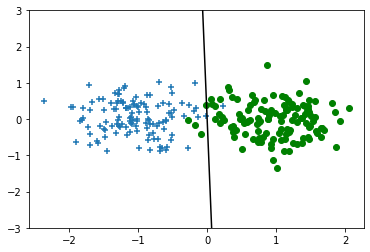

In [7]:
plt.scatter(x1[:,0],x1[:,1], marker='+')
plt.scatter(x2[:,0],x2[:,1], c= 'green', marker='o')
a = -w[0][0] / w[0][1]
xx = np.linspace(-1, 1)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k-')
plt.gca().set_ylim([-3, 3])


Question3:

(-3.0, 3.0)

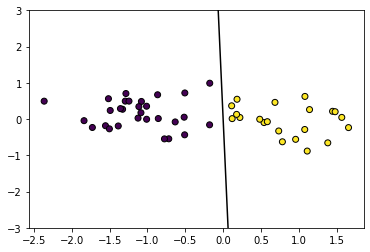

In [8]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred, edgecolors='k');

a = -w[0][0] / w[0][1]
xx = np.linspace(-1, 1)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k-')
plt.gca().set_ylim([-3, 3])

In [9]:
accuracy_score(y_test,y_pred)


0.98

## Experiment n°2

Question 1: 
We generate a dataset with high variance so the variable are not linearly seperable so the algorithm will not converge.

Question 2: 
The decision boundry depends of the initial initialisation of our weights of the perceptron. 

As we change the initialisation,  the will have different line so different boundries. 

but as we say previously we dont have convergence, so we cannot have a decision boundry before speaking about uniqueness

In [10]:
X_train, X_test, y_train, y_test,x1,x2=generate(0.75)
w = perceptron(X_train,y_train)
print(w)

[[ 0.73023089 -1.09015607]]


In [11]:
y_predict = np.inner(X_test,w)
y_pred=[]
for i,pred in enumerate(y_predict) :
    if pred > 0 :
        y_pred.append(1)
    else :
        y_pred.append(-1)
print(y_pred)

[-1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1]


(-3.0, 3.0)

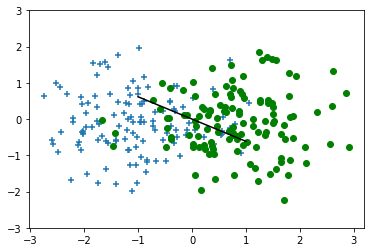

In [12]:
plt.scatter(x1[:,0],x1[:,1], marker='+')
plt.scatter(x2[:,0],x2[:,1], c= 'green', marker='o')
a = -w[0][0] / w[0][1]
xx = np.linspace(-1, 1)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k-')
plt.gca().set_ylim([-3, 3])


Question3

(-3.0, 3.0)

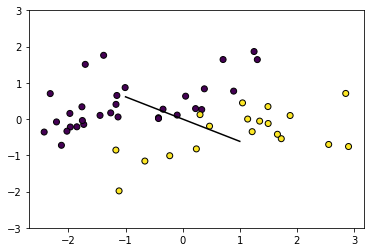

In [13]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred, edgecolors='k');

a = -w[0][0] / w[0][1]
xx = np.linspace(-1, 1)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k-')
plt.gca().set_ylim([-3, 3])

In [14]:
accuracy_score(y_test,y_pred)

0.74

### Interpretation
As seen before, we will have an convergence state in the first experiment so the variable are linearly seperable and therefore the we have a good classification exprimed by have a seperable classes , a nice decision boundry and an accurency of 100%
But in the 2nd case, the variable are not linear seperable and so the in the test set , we will have a non seperable classes with some outliers. Our algorithm doesn't converge in the case and we have an accurency of 88%.

## Expirement 3

In [15]:
sigs = [0.01,0.1,0.5,0.7]
error_mean =[]
error_var = []
nb_experiments=30
for sig in sigs:
  # the list containing the error to use later for statistical studies
  error=[]
  # do the expriments 30 times.
  for element in range(nb_experiments):
    # an expirement consist of generating data, training the model, do a prediction on th test set and evaluating the error rate.
    X_train, X_test, y_train, y_test,x1,x2=generate(sig)
    w=perceptron(X_train,y_train)
    y_predict = np.inner(X_test,w)
    y_pred=[]
    for i,pred in enumerate(y_predict) :
      if pred > 0 :
        y_pred.append(1)
      else :
        y_pred.append(-1)
    error.append(1-accuracy_score(y_test,y_pred))
  # add the error mean and variance to a the correspanding rates
  error_mean.append(np.mean(error))
  error_var.append(np.var(error))

<ErrorbarContainer object of 3 artists>

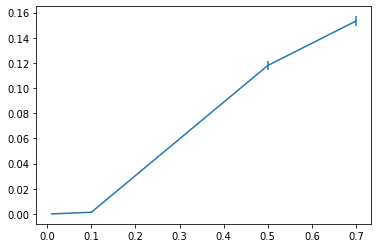

In [16]:
plt.errorbar(sigs,error_mean,error_var) 

As we see, more the variance increase, more the error increase with more variation of error also. So for small sigma , the percptron can seperate the 2 classes. But as we go further, the error increase and the seperablity power will diminish. So  the 2 classes will be not seprably for higher values of variance.